<img src="http://www.cidaen.es/assets/img/mCIDaeNnb.png" alt="Logo CiDAEN" align="right">




<br><br><br>
<h2><font color="#00586D" size=4>Capstone IV</font></h2>



<h1><font color="#00586D" size=5><i>Machine Learning</i> aplicado a márketing</font></h1>

<br><br><br>
<div align="right">
<font color="#00586D" size=3>Luis de la Ossa</font><br>
<font color="#00586D" size=3>Máster en Ciencia de Datos e Ingeniería de Datos en la Nube</font><br>
<font color="#00586D" size=3>Universidad de Castilla-La Mancha</font>

</div>
<br>

---
<br>

<h2><font color="#00586D" size=5>Introducción</font></h2>
<br>




En este proyecto se plantean tres supuestos que guardan relación con el área del márketing y la gestión de la relación con el cliente (_Customer Relationship Management_). El primero consiste en el desarrollo de un *pipeline* completo para la predicción del abandono  de clientes (_Churn prevention_).  En el segundo se desarrollará un modelo que permite estimar el valor potencial de un cliente (_Customer Lifetime Value_). Por último, se recurrirá al aprendizaje no supervisado para segmentar un conjunto de clientes en grupos.


A diferencia de los proyectos anteriores, que consistían exclusivamente en la solución de ejercicios prácticos, en éste se plantearan también algunas preguntas relacionadas con la interpretación y análisis del proceso, y que ***habrán de ser respondidas en la propia libreta***. 
<br>


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Aunque el proyecto es fácil, es algo largo ya que, además de bastantes ejercicios, se aportan abundantes explicaciones y comentarios sobre el propio proceso. Especialmente en el planteamiento del primer ejercicio. Recomendamos leerlas atentamente.
</div>

---

<a id="indice"></a>
<h2><font color="#00586D" size=5>Índice</font></h2>


* [1. Prevención del abandono (_churn prevention_)](#section1)
    * [1.1. Exploración de los datos. Preprocesamiento](#section11) 
    * [1.2. Construcción de un modelo](#section12)     
    * [1.3. Validación sobre nuevos datos](#section13)  
    * [1.4. Comparación con otros modelos](#section14)  
* [2. Predicción del valor potencial de un cliente (_Customer Lifetime Value_)](#section2) 
    * [2.1. Construcción de un árbol de regresión](#section21)  
* [3. Segmentación de clientes](#section3) 

In [1]:
# Configuración de la visualización
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

%matplotlib inline
#%config InlineBackend.figure_format = 'retina'


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns;
sns.set()

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section1"></a>
# <font color="#00586D"> 1. Prevención del abandono (_churn prevention_)</font>


<br> La prevención del abandono, o _Churn prevention_, es una tarea de _márketing_ que consiste en detectar 
aquellos clientes que podrían abandonar un determinado servicio o mercado, y llevar a cabo campañas específicas de retención con el fin de evitar la pérdida. 
<br>

Esta parte del proyecto consiste en la elaboración de un modelo basado en aprendizaje supervisado (clasificación) para la detección de clientes en esta situación. Se proporciona un conjunto de datos denominado `Telco-Customer-Churn.csv`, relativo al abandono en una operadora de telecomunicaciones, y obtenido en el sitio de [IBM analytics](https://www.ibm.com/analytics). Alguna información adicional, así como _kernels_ que tratan estos mismos datos y pueden resultar útiles (_se recomienda que los miréis_) están disponibles en [Kaggle](https://www.kaggle.com/blastchar/telco-customer-churn). 

In [2]:
# Carga los datos 
df_churn = pd.read_csv('data/churn/Telco-Customer-Churn.csv', index_col=0);

print("Tamaño del conjunto de datos:  %d" % df_churn.shape[0])
print("Número de variables: %d" % df_churn.shape[1])

if df_churn.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
    
# Visualiza las primeras instancias
df_churn.head()

Tamaño del conjunto de datos:  7043
Número de variables: 20
El índice es único.


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>  Como línea de trabajo, se asumirá que el modelo se desarrolla a partir de un conjunto manejable de datos etiquetados (histórico), pero será utilizado sobre un conjunto de datos actual, no etiquetado, y mucho mayor. Debido a esto, se dividirá el conjunto de datos almacenado en `df_churn` en dos: `df_churn` con el 85% de las entradas, y que será utilizado en el proceso de desarrollo (y validación) del modelo; y `df_churn_new`, con el 15% restante, que permitirá tanto comprobar la correcta definición del flujo de trabajo sobre datos nuevos, como proporcionar medidas de rendimiento del modelo. 

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> El conjunto de datos `df_churn_new` __no será utilizado en ninguna fase del proceso de aprendizaje__, ni siquiera para la exploración, preprocesamiento, o la validación del modelo.
</div>

In [3]:
# Tamaño del conjunto de entrenamiento
training_size = int(len(df_churn)*0.85)

# Desordena los datos (esto es muy importante).
df_churn = df_churn.sample(frac=1, random_state=0)

# Copia los datos de test.
df_churn_new = df_churn.iloc[training_size:].copy()

# Copia los datos para el entrenamiento del modelo.
df_churn = df_churn.iloc[:training_size].copy()

print("Tamaño del conjunto de datos disponibles: ", len(df_churn))
print("Tamaño del conjunto de nuevos datos: ", len(df_churn_new))

Tamaño del conjunto de datos disponibles:  5986
Tamaño del conjunto de nuevos datos:  1057


En ciencia de datos es frecuente que el punto de partida del trabajo lo constituyan datos desconocidos. El primer paso, *también cuando se trabaja con aprendizaje automático*, consiste en **explorar estos datos**. Además de la familiarización con el problema (que no siempre es posible), como fruto de la exploración surgen decisiones que afectan _principalmente_ a la preparación y al preprocesamiento. 
<br>

En general, el proceso de exploración no es sistemático, sino que se lleva a cabo en base a la información que va arrojando el propio proceso, y es guiado en parte por la intuición y experiencia del analista. En cada paso, surge la necesidad de hacer transformaciones a los datos originales de cara a su uso en la construción del modelo predictivo. Estos cambios pueden ir haciéndose progresivamente. Sin embargo, ***todo el proceso ha de ser registrado de algún modo, ya que ha de ser reproducido para el tratamiento de nuevos datos*** que, en un contexto real, son adquiridos con el formato del conjunto de datos original.
<br>

<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>  A lo largo del módulo se ha estudiado como hacer _pipelines_ o secuencias de funciones en `scikit-learn`. Aunque _esta funcionalidad es muy útil_, incorporar todo el proceso de los datos dentro de un _pipeline_ de `scikit-learn` puede ser tedioso, e incluso puede haber limitaciones que lo impidan o hagan recomendable un modo alternativo de trabajo. En realidad, _es posible apartar (y anticipar) algunas tareas de preparación de datos_ del proceso definido en el _pipeline_ de `scikit-learn`. Así, operaciones como la eliminación o transformación de columnas, cuya aplicación en nuevos datos es _totalmente independiente del entrenamiento_,  pueden definirse y llevarse a cabo en un _pipeline_ de `pandas`, anterior a la construcción (y uso) del modelo de clasificación.
<br>

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> Ejemplos de operaciones que dependen del entrenamiento son la estándarización o la sustitución de valores perdidos por la media/mediana. Éstas sí deben formar parte del *pipeline* de `scikit-learn` ya que implican instanciar un transformador.
</div>

En este proyecto se propone un modo de trabajar en el que sucesivamente, _durante la exploración_, se aplicarán funciones de preprocesamiento a un _DataFrame_. Estas funciones serán almacenadas en una lista que, finalmente, podrá ser utilizada para creación del _pipeline_ de `pandas`que implementa la secuencia de acciones de preprocesamiento sobre nuevos datos. Una vez disponible una versión adecuada de los datos, el trabajo con `scikit-learn` se hará según el procedimiento habitual.


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: El modo de trabajo que se propone __no es el único, pero es una alternativa__ que puede ser conveniente en algunos supuestos, y distinta a las vistas en clase (implementación de transformadores). Por otra parte, esta tarea  se centra en la construcción de modelos, por lo que __la parte de exploración se ha reducido al mínimo imprescindible__. No obstante, podéis incluir pasos adicionales en este sentido si lo veis conveniente.
</div>

Considerando el planteamiento descrito, es necesario registrar las transformaciones que se irán haciendo sobre el *DataFrame* y el tratamiento que se hará finalmente a cada variable dentro del *pipeline* de `scikit-learn`. Para ello, se utilizarán tres listas:

* `churn_data_prep_pipeline`, que guardará la secuencia de funciones de transformación (referencias) aplicadas al _DataFrame_.

* `cat_features`, que guardará los nombres de las columnas que contienen valores discretos, y que han de ser tratadas  como categóricas en el _pipeline_ de `scikit-learn`.

* `num_features`, que guardará los nombres de las columnas que han de ser tratadas como numéricas en el _pipeline_ de `scikit-learn`.

In [4]:
# Lista de funciones aplicadas en la preparación de los datos
churn_data_prep_pipeline = []

# Características que serán consideradas categóricas y numéricas en el pipeline
cat_features = []
num_features = []

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section11"></a>
## <font color="#00586D"> 1.1 Exploración de los datos. Preprocesamiento. </font>
<br>


El objetivo principal de este trabajo es predecir la baja de un determinado usuario mediante un modelo de clasificación. Por eso, uno de los pasos más importantes en la exploración consiste en el análisis e interpretación de la distribución de las clases. Este factor puede resultar de interés en el entrenamiento, pero también de cara a la evaluación. 

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 1 </font> 
Dibujar un diagrama de barras (`sns.catplot()` o `sns.countplot()`) con la distribución de las clases (columna `Churn`) sobre las muestras. Obtener los posibles valores de las mismas. Comentar qué se aprecia en la gráfica, en qué modo puede afectar esto al rendimiento del clasificador, y si esto influye en el modo en que se ha de llevar a cabo la evaluación. 

Clases:  ['No' 'Yes']
El porcentaje de muestras positivas es 0.27


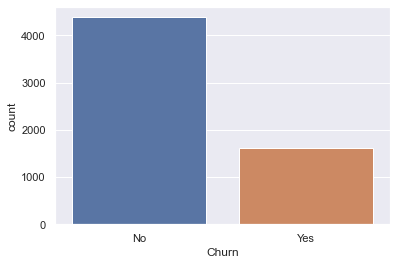

In [5]:
#
sns.countplot(data=df_churn, x='Churn')
#

print("Clases: ", df_churn['Churn'].unique())
print(f"El porcentaje de muestras positivas es {(sum(df_churn['Churn']=='Yes') / df_churn.shape[0]):.2f}")

___Respuesta___
<br><br>
`La distribución de la variable respuesta 'Churn' esta claramente desbalanceada. Esta situación puede afectar al clasificador aumentando su sesgo hacia las muestras negativas generando un mayor numero de falsos negativos. Va a afectar al modo de evaluación. Se debería considerar la estratificación de las muestras a la hora de repartir los conjuntos de datos para entrenamiento, validación y test. Además en cuanto al modo de evaluación es importante utilizar métricas adecuadas para conjuntos de datos desbalanceados, como precision o recall o el F-score`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Puede apreciarse que las clases están codificadas como _Strings_. Para trabajar con `scikit-learn` se necesita convertirlas a formato numérico.

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> 
Este paso no será incluido en el _pipeline_. El motivo es que (tal y como se comentó anteriormente) una vez diseñado, se debería implantar para el procesamiento de datos nuevos que ___no___ contienen información relativa a la clase. 
</div>

A continuación, se convierte la columna correspondiente a la clase a formato numérico.

In [6]:
df_churn['Churn'] = (df_churn['Churn']=='Yes').astype(int)
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,Female,0,No,No,19,Yes,No,DSL,No,Yes,No,No,Yes,No,One year,No,Electronic check,58.20,1045.25,0
3680-CTHUH,Male,0,No,No,60,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,Yes,Credit card (automatic),116.60,7049.5,0
4931-TRZWN,Female,0,No,No,13,Yes,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,71.95,923.85,0
8559-WNQZS,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.45,20.45,0
3537-HPKQT,Female,0,Yes,No,55,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Credit card (automatic),77.75,4266.4,0


Una vez explorada la clase, se procede con las características, para lo cual se comprobarán primero los tipos.

In [7]:
df_churn.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int32
dtype: object

Puede observarse que hay columnas de enteros, flotantes y también _Strings_ (objetos). Se dividirán las columnas por tipo, y se procederá a examinar y tratar cada grupo por separado.

<div class="alert alert-block alert-info">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> 
En este caso de estudio se puede proceder así, ya que **el número de variables es manejable**. En casos con más variables, habría que hacer una exploración de carácter más superficial, y definir métodos de carácter general.
</div>
<br>

A continuación se almacenan los nombres de las columnas numéricas del _DataFrame_ en una lista denominada `num_df_columns`, y el resto en otra denominada `cat_df_columns`. 



<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i>
***Observad*** que éstas listas son distintas de `num_features` y `cat_features`, que contienen los nombres de las características en función de ***cómo serán tratadas finalmente*** en el _pipeline_ de `scikit-learn`. 
</div>
<br>

In [8]:
dis_df_columns = df_churn.select_dtypes(exclude=np.number).columns
num_df_columns = df_churn.select_dtypes(include=np.number).columns

print('Discretas: ',dis_df_columns)
print('\nNuméricas: ',num_df_columns)

Discretas:  Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'TotalCharges'],
      dtype='object')

Numéricas:  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'Churn'], dtype='object')


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Se comenzará tratando las variables discretas, ya que a veces conviene convertirlas a numéricas, y luego se pueden incluir en la exploración y análisis de las variables numéricas. 
</div>


<br>

### <font color="#00586D">Tratamiento de las columnas discretas </font>


 
<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>  En relación a estas columnas, dos aspectos muy relevantes de cara a la construcción de un modelo con `scikit-learn` son: el número de valores que puede tomar cada una; y si existe una relación de orden entre estos valores. Estos factores determinan el tipo de transformación que se ha de hacer. Existen ***cuatro posibilidades***:

* Cuando la columna toma dos valores, se puede binarizar y convertir a numérica diréctamente. 
* Si el tamaño del conjunto de valores es mayor que dos, y no existe una relación de orden entre ellos, se aplica _One Hot Encoding_ (se aplicará posteriormente en el *pipeline* de transformaciones).
* Si existe una relación de orden, los valores se transforman a numéricos, sustituyendo cada valor por su orden. 
* Si el conjunto de valores extremadamente grande se ha de explorar, ya que es muy posible que se trate de un identificador, o de un error.

A continuación, se obtiene el número de valores para cada una de las variables discretas y se almacena en una lista denominada `num_values_dis_df_col`. Cada elemento de la lista es una tupla con el nombre de la columna y el número de variables. 

In [9]:
num_values_dis_df_col = list(map(lambda col: (col,len(df_churn[col].value_counts())), dis_df_columns))
num_values_dis_df_col

[('gender', 2),
 ('Partner', 2),
 ('Dependents', 2),
 ('PhoneService', 2),
 ('MultipleLines', 3),
 ('InternetService', 3),
 ('OnlineSecurity', 3),
 ('OnlineBackup', 3),
 ('DeviceProtection', 3),
 ('TechSupport', 3),
 ('StreamingTV', 3),
 ('StreamingMovies', 3),
 ('Contract', 3),
 ('PaperlessBilling', 2),
 ('PaymentMethod', 4),
 ('TotalCharges', 5608)]

#### <font color="#00586D"> Variables binarias </font>

Como se comentó anteriormente, las variables discretas que toman dos valores se pueden binarizar directamente, salvo en el caso de no proporcionar información útil, que se pueden eliminar. 

A partir de la lista `num_values_dis_df_col` se obtienen los nombres de las columnas binarias y se almacenan en una lista denominada `dis_df_col_bin`.

In [10]:
dis_df_col_bin = list(map(lambda cv: cv[0],(filter(lambda cv: cv[1]==2,num_values_dis_df_col))))
dis_df_col_bin

['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 2</font>
Dibujar la distribución de cada una de estas variables utilizando una gráfica de tipo `sns.countplot()` para cada una de ellas. Es posible visualizar también la variable de clase (con `hue='Churn', dodge=False`).

 
<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font>  En este ejercicio se crea una figura con cuatro gráficas, y en cada una de ellas hay que dibujar el `sns.countplot()` correspondiente a cada una de las columnas, utilizando el color de la gráfica para distinguir la variable `Churn`.

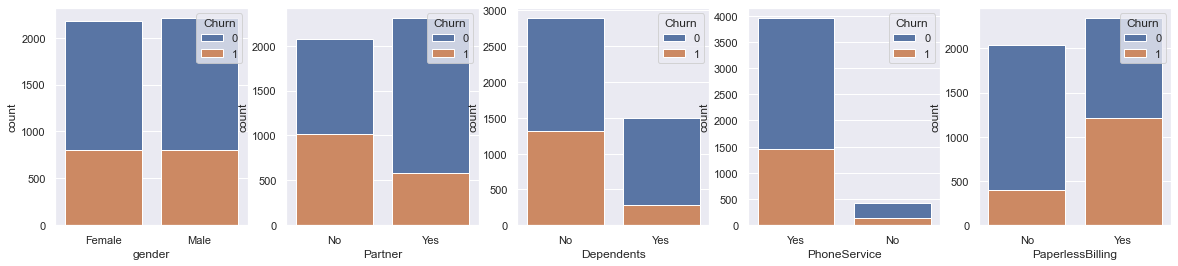

In [11]:
fig, axs = plt.subplots(1, 5, figsize=(20, 4))

#
sns.countplot(x = 'gender', data= df_churn, hue='Churn', dodge=False, ax = axs[0])
sns.countplot(x = 'Partner', data= df_churn, hue='Churn', dodge=False, ax = axs[1])
sns.countplot(x = 'Dependents', data= df_churn, hue='Churn', dodge=False, ax = axs[2])
sns.countplot(x = 'PhoneService', data= df_churn, hue='Churn', dodge=False, ax = axs[3])
sns.countplot(x = 'PaperlessBilling', data= df_churn, hue='Churn', dodge=False, ax = axs[4]);
#

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Independientemente de que lo relevantes que puedan ser a la hora de clasificar, parece que todas las variables y sus valores tienen sentido, por lo que se van a preservar. 

La siguiente función, `churn_binarize_dis`, recibe un _DataFrame_ y transforma las columnas de `dis_df_col_bin` a un entero binario.

In [12]:
# Para gender --> Male=0, Female=1
# Pare el resto: --> No=0, Yes=1
def churn_binarize_dis(df):
    df['gender'] = (df['gender']=='Female').apply(int)
    df['Partner'] = (df['Partner']=='Yes').apply(int)
    df['Dependents'] = (df['Dependents']=='Yes').apply(int)
    df['PhoneService'] = (df['PhoneService']=='Yes').apply(int)
    df['PaperlessBilling'] = (df['PaperlessBilling']=='Yes').apply(int)
    return df # No hace falta

# Comprueba si la función está bien sobre una copia de los datos
display(churn_binarize_dis(df_churn.head(5).copy()))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,One year,0,Electronic check,58.20,1045.25,0
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,One year,1,Credit card (automatic),116.60,7049.5,0
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,Month-to-month,1,Electronic check,71.95,923.85,0
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.45,20.45,0
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,1,Credit card (automatic),77.75,4266.4,0


A continuacion se aplica la función `churn_binarize_dis` a los datos, y se añade a la lista de acciones de preprocesamiento, `churn_data_prep_pipeline`. 

In [13]:
# Lo aplica
churn_binarize_dis(df_churn)

# Lo añade.
churn_data_prep_pipeline.append(churn_binarize_dis)

Las variables originalmente discretas que han sido transformadas a binarias, se han de tratar como numéricas, por lo que se añaden a la lista `num_features`.

In [14]:
# Añade las variables
num_features.extend(dis_df_col_bin)
# Muestra las variables numéricas
print('Variables numéricas: ', num_features)

Variables numéricas:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']


#### <font color="#00586D"> Variables categóricas </font>

Las variables discretas que toman más de dos valores se pueden tratar como categóricas con _One Hot Encoding_ (posteriormente) o, si son ordinales, se pueden transformar a numéricas. En primer lugar, hay que explorar el tipo y distribución de valores de cada una de ellas, y ver si se pueden considerar como ordinales.  

A partir de `num_values_dis_df_col`, se pueden obtener los nombres de las columnas discretas que tienen más de dos valores y menos de cinco. Se almacenarán en una lista denominada `dis_df_columns_cat`.

In [15]:
dis_df_columns_cat = list(map(lambda cv: cv[0],(filter(lambda cv: cv[1]>2 and cv[1]<5, num_values_dis_df_col))))
dis_df_columns_cat

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaymentMethod']

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 3</font>

Dibujar la distribución de cada una de estas variables utilizando una gráfica de tipo `sns.countplot()`. Para cada una de ellas para comprobar que todos los valores son correctos.

<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> Este ejercicio es parecido al anterior. Se trata crear una figura con diez gráficas, una por columna, y dibujar una gráfica en cada una de ellas.

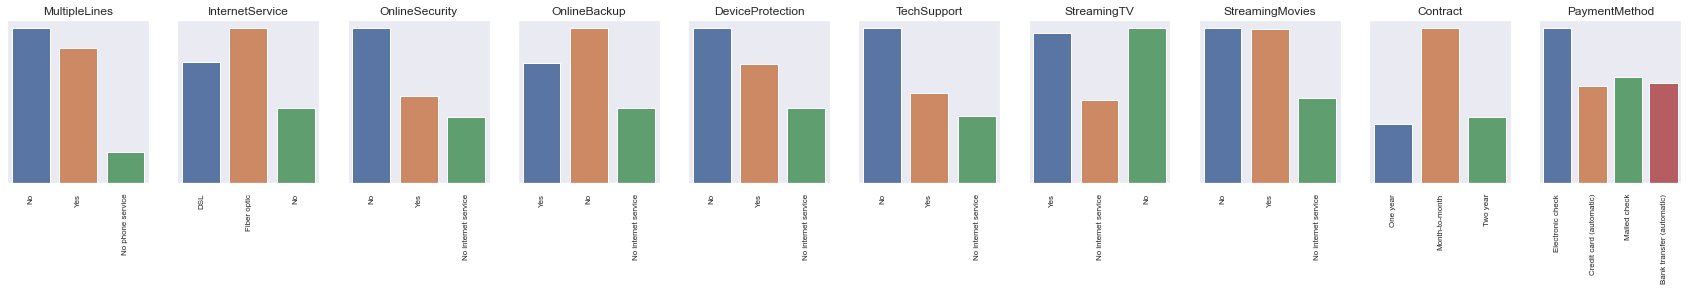

In [16]:
fig, axs = plt.subplots(1, 10, figsize=(30, 3))

for col, ax in enumerate(axs.flatten()):
    
    #
    col_name = dis_df_columns_cat[col]
    sns.countplot(x = col_name, data= df_churn, ax = ax)
    #

    # Para que se vean mejor
    ax.set_title(col_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90, fontsize=8)
    ax.set_yticks([])
    ax.set_xlabel(None)
    ax.set_ylabel(None)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 4</font>

Explorar estas variables (de una en una) mediante `sns.countplot()`,  utilizando hue la relación de las variables con `Churn` (con `hue='Churn', dodge=False`). ¿Qué variable o variables parecen más relevantes? Dibujar solo una gráfica cada vez, y finalmente dejar solamente la  correspondiente a la variable más relevante (si la hubiera) y comentar por qué lo es.

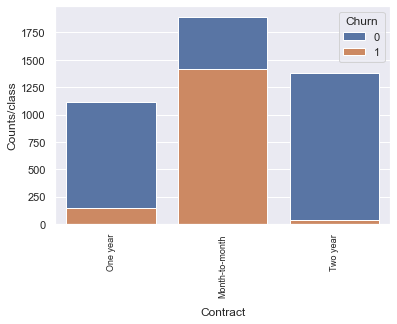

In [17]:
col_name = 'Contract'

#'MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaymentMethod'

#
sns.countplot(x = col_name, data= df_churn, hue = 'Churn', dodge=False)
#

plt.xticks(rotation=90, fontsize=9)
plt.xlabel(col_name, labelpad=10)
plt.ylabel('Counts/class')
plt.show()

___Respuesta:___

`La variable 'Contract' parece la más relevante para predecir las bajas de clientes. Los contratos tipo Month-to-month tienen una gran probabilidad de causar baja en la compañia. Apenas hay bajas en los contratos de 1 año y de 2 años. Por último el valor total de conteo de bajas en 'Month-to-month' es aproximadamente de 1500 agrupando un número importante de los datos de bajas en el conjunto de datos estudiado.`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

En principio, parece que todas las columnas se podrían tratar como categóricas, aunque la columna `Contract` se _podría_ considerar ordinal. Por tanto, se añadirán todas las variables, menos `Contract`, a la lista `cat_features`.

In [18]:
cat_features = dis_df_columns_cat[:] # Copia la lista
cat_features.remove('Contract')      # Borra Contract
cat_features

['MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaymentMethod']

La función `churn_transform_contract` toma como entrada un *DataFrame* y convierte la columna `Contract` en numérica  asignando los valores a partir del diccionario `con_to_ordinal`.

In [19]:
con_to_ordinal = {'Month-to-month':1, 'One year':2, 'Two year':3}

def churn_transform_contract(df):
    df['Contract'] = df['Contract'].map(con_to_ordinal)
    
    return df # No hace falta

# Comprueba si la función está bien
display(churn_transform_contract(df_churn.head(5).copy()))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,2,0,Electronic check,58.20,1045.25,0
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,1,Credit card (automatic),116.60,7049.5,0
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,1,1,Electronic check,71.95,923.85,0
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,0,Mailed check,20.45,20.45,0
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,1,1,Credit card (automatic),77.75,4266.4,0


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 5</font>

Para esta variable, se ha hecho una asignación de valores ` {'Month-to-month':1, 'One year':2, 'Two year':3}`. Además de que es intuitiva,  parece consistente con la información que muestra la gráfica. ¿Por qué?

___Respuesta:___

`La asignación de valores es intuitiva porque sigue una logica numerica en la que se asignan valores más altos a los contratos de mayor duración. Además es consistente con la información que muestra la grafica porque los valores más altos se corresponden con menores tasas de abandono de la compañia. A mayor duración del contrato mayor es el porcentaje de clientes que se mantienen en la compañia frente a los que la abandonan`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

En este punto, se debe añadir la función `churn_transform_contract` a `churn_data_prep_pipeline`, aplicarla al `DataFrame` `df_churn`.

In [20]:
# Lo aplica
churn_transform_contract(df_churn)

# Lo añade.
churn_data_prep_pipeline.append(churn_transform_contract)

Por otra parte,`Contract` se tratará como una variable numérica, por lo que se añade a `num_features`. 

In [21]:
# Añade las variables
num_features.append('Contract')

# Las muestra
print('Variables numéricas: ', num_features)

Variables numéricas:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract']


#### <font color="#00586D"> Total Charges </font>

La columna `TotalCharges`, a pesar de estar representada como un objeto, contiene datos numéricos. Debido a esto, se va a transformar en numérica, asignando valores `NaN` a las entradas que no se han podido transformar en numéricas al leer el *DataFrame*. La función `churn_charges_to_numeric` toma como entrada un *DataFrame* y convierte la columna `TotalCharges` en numérica.

In [22]:
def churn_charges_to_numeric(df):
    df['TotalCharges'] = pd.to_numeric(df_churn['TotalCharges'], errors='coerce')
    return df # No hace falta

# Comprueba si la función está bien
display(churn_charges_to_numeric(df_churn.head(5).copy()))

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,2,0,Electronic check,58.20,1045.25,0
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,1,Credit card (automatic),116.60,7049.50,0
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,1,1,Electronic check,71.95,923.85,0
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,0,Mailed check,20.45,20.45,0
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,1,1,Credit card (automatic),77.75,4266.40,0


La función `churn_charges_to_numeric` también se añade `churn_data_prep_pipeline` y se aplica `df_churn`. 

In [23]:
# Lo aplica
churn_charges_to_numeric(df_churn)

# Lo añade.
churn_data_prep_pipeline.append(churn_charges_to_numeric)

Se ha de incluir `TotalCharges` en la lista de columnas numéricas, `num_features`. 

In [24]:
# Añade las variables
num_features.append('TotalCharges')

# Las muestra
print('Variables numéricas: ', num_features)

Variables numéricas:  ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'TotalCharges']


Hasta el momento, estos son los pasos que se han llevado a cabo en el preprocesamiento.

In [25]:
print("\nPasos de preprocesamiento: ")
for step, function in enumerate(churn_data_prep_pipeline):
    print("\t {:d}: {:s}".format(step, function.__name__))


Pasos de preprocesamiento: 
	 0: churn_binarize_dis
	 1: churn_transform_contract
	 2: churn_charges_to_numeric


Y estas son las características (*originalmente discretas*) que serán tratadas como categóricas y como numéricas.

In [26]:
print('Variables que se tratarán como categóricas: \n\t',cat_features, end='\n\n')
print('Variables que se tratarán como numéricas: \n\t',num_features)

Variables que se tratarán como categóricas: 
	 ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']

Variables que se tratarán como numéricas: 
	 ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'TotalCharges']


### <font color="#00586D">Tratamiento de las columnas numéricas </font>
<br>

El tratamiento de las columnas numéricas es relativamente sencillo, y se puede descomponer en varias etapas:

* Comprobar que, efectivamente, corresponden a características numéricas. 
* Detección y tratamiento de outliers. 
* Detección y tratemiento de valores perdidos. 
* Exploración de las variables. 

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> 
Esta es una posible descomposición, y ha de considerarse como sugerencia. Si los *outliers* se sustituyen por valores perdidos, deben tratarse antes que estos.
</div>

#### <font color="#00586D"> Comprobación de tipos </font>

En algunos casos, las columnas numéricas pueden representar características categóricas. Para detectar esta situación es posible apoyarse, además de en el nombre (descriptivo) de las columnas, en el número de valores que éstas toman. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Otra opción consiste en elaborar gráficas (pero se harán después porque en este caso no es necesario).
</div>

A continuación, se obtiene el número de valores para cada una de las variables que han sido almacenadas como numéricas en el *DataFrame* original (`num_df_columns`). 

In [27]:
list(map(lambda col: "{:s}: {:d}".format(col,len(df_churn[col].value_counts())), num_df_columns))

['SeniorCitizen: 2', 'tenure: 73', 'MonthlyCharges: 1529', 'Churn: 2']

Parece dos de las variables son binarias, y otras dos son numéricas, por lo que no hay que hacer cambios. 

#### <font color="#00586D"> Outliers </font>


Existen varios métodos para llevar a cabo la detección de outliers. Por ejemplo, en el caso de que el número de características sea reducido, y que las escalas sean similares, se podría utilizar un gráfico de cajas. Otra posibilidad consite en visualizar los rangos que toman las variables.  

In [28]:
df_churn[num_df_columns.to_list()+['TotalCharges']].describe(percentiles=[0.01,0.25,0.5,0.75,0.99])

,SeniorCitizen,tenure,MonthlyCharges,Churn,TotalCharges
count,5986.000000,5986.000000,5986.000000,5986.000000,5977.000000
mean,0.166889,32.186435,64.821024,0.267959,2273.195483
std,0.372908,24.503081,30.033744,0.442933,2258.880108
min,0.000000,0.000000,18.250000,0.000000,18.800000
1%,0.000000,1.000000,19.150000,0.000000,19.850000
25%,0.000000,9.000000,35.825000,0.000000,400.000000
50%,0.000000,28.000000,70.400000,0.000000,1396.250000
75%,0.000000,55.000000,89.850000,1.000000,3772.650000
99%,1.000000,72.000000,114.557500,1.000000,8027.362000
max,1.000000,72.000000,118.750000,1.000000,8684.800000


Parece que los valores mínimo y máximo en las variables `tenure`, `MonthyCharges` y `TotalCharges` no se alejan excesivamente de los rangos razonables en ningún caso. Por tanto, no hay que proceder en este caso. 

#### <font color="#00586D"> Valores perdidos </font>


A continuación, se comprueba si existen valores perdidos para alguna de las variables numéricas. 

In [29]:
df_churn[num_df_columns.to_list()+['TotalCharges']].isna().any()

SeniorCitizen     False
tenure            False
MonthlyCharges    False
Churn             False
TotalCharges       True
dtype: bool

Puede apreciarse que solo los hay para `TotalCharges`. 

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> 
El tratamiento de los valores perdidos es conveniente hacerlo en el _pipeline_ de `scikit-learn`, ya que en muchos casos se usará la media o mediana de la variable en el conjunto de entrenamiento, y este valor se ha de almacenar.
</div> 

#### <font color="#00586D"> Exploración </font>


Por último, puede resultar de interés llevar a cabo una pequeña exploración de las variables numéricas para ver tanto sus distribuciones como su relación con la clase. Es importante recordar que anteriormente se convirtieron algunas variables discretas a numéricas. Por tanto, se actualizará la lista `num_features`, añadiendole los elementos de `num_df_colums`, es decir, de las columnas que eran numéricas inicialmente.

In [30]:
num_features = num_features + num_df_columns.to_list()  
num_features

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Contract',
 'TotalCharges',
 'SeniorCitizen',
 'tenure',
 'MonthlyCharges',
 'Churn']


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 6</font>

Dibujar, para las variables `tenure`, `MonthlyCharge` y `TotalCharges` (las que no son binarias), un gráfico del tipo `sns.kdeplot()` que muestre la distribución de valores para cada una de las clases (dos distribuciones por gráfica). Utilizar una figura de $1 \times 3$ gráficas. Comentar qué se observa en la gráfica. 

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> 
Si da error, utilizar como fuente de datos `df_churn.dropna()`.
</div> 

<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> En este caso hay que dibujar tres gráficas. En cada una de ella se representa la distribución de los valores de la columna, pero se utiliza el color para diferenciar entre las dos categorías que puede tomar `Churn`.

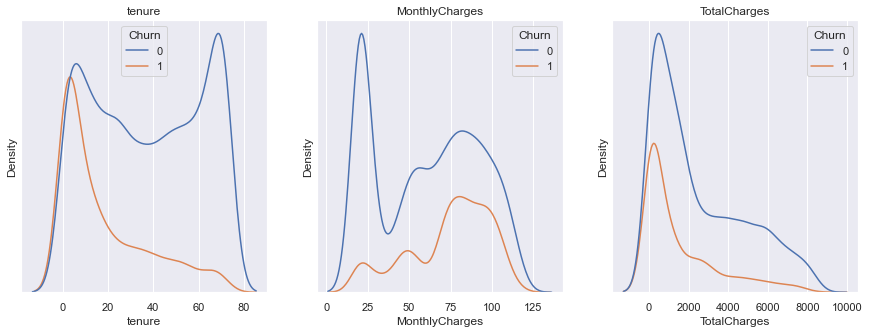

In [31]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
features = ['tenure', 'MonthlyCharges','TotalCharges']
for col, ax in enumerate(axs.flatten()):
    col_name = features[col]
    
    #
    sns.kdeplot(x = col_name, data= df_churn, hue = 'Churn', ax = ax)
    #
    
    ax.set_title(col_name);    
    ax.set_yticks([])

___Respuesta:___

Para la variable `'tenure',` se observa una distribución de valores más alta y mas ancha para los clientes que permanecieron en la compañía, lo que indica que estos clientes tienen una duración media de contrato mayor. Por otro lado, se observa una distribución de valores alta y estrecha para los clientes que abandonaron la compañía en los primeros meses, lo que indica que estos clientes tienen una duración media de contrato menor.
Respecto a la variable `'MonthlyCharges'`, se observa una distribución de valores más alta para los clientes que permanecieron en la compañia la compañía observandose dos distribuciones. Una mas alta cercana a valores de 25 y una segunda mas pequeña y ancha en valores cercanos a 80. Los clientes que abandonaron la compañia muestran 3 picos en valores cercanos a 25, 50 y 80, lo que indica 3 grupos diferenciados en cuanto a servicios contratados siendo este último el más importante.
Para la variable `'TotalCharges'`, se observan distribuciones con formas similares en ambos casos con un pico centrado en valores menores de 1000 y con una cola hacia valores más altos. La distribución es mayor para los que permanecen en la compañia que para los que la abandonan.

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 7</font>
Calcular la correlacción entre las variables numéricas y mostrarla en una gráfica `sns.heatmap()`.

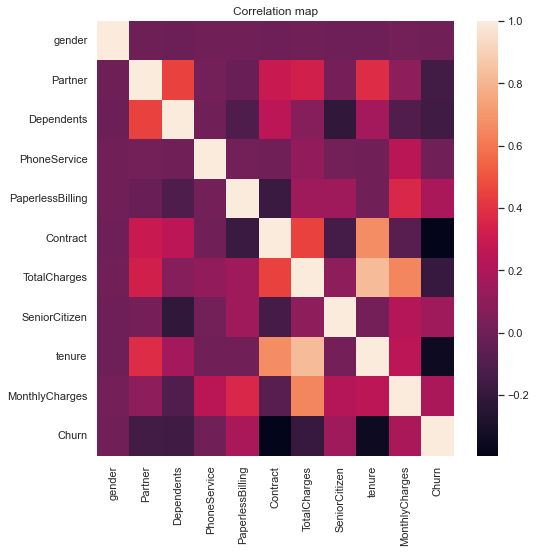

In [32]:
corrmat = df_churn[num_features].corr(method='pearson')

# Mapa de calor con seaborn
plt.figure(figsize=(8,8))
#
sns.heatmap(corrmat)
# 
plt.title("Correlation map")
plt.show()

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 8</font>

Comentar qué se observa en la gráfica (si se observa o no alguna circunstancia relevante). 

___Respuesta:___

`Observando la variable respuesta 'Churn' se puede comprobar que tiene una correlación negativa con el tipo de contrato (mayor valor de Churn = 1 o abandono para menor valor de contrato = 1 o Month-to-month). Tambien se observa una correlación negativa con 'tenure', es decir mayor abandono con menor numero de meses de estancia en la compañia. Entre las variables estudiadas se observa una correlación positiva entre los 'TotalCharges' y 'Tenure' indicando que los clientes que llevan más tiempo en la compañia tienden a gastar mas`


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<br>

### <font color="#00586D">Preprocesamiento</font>
<br>

Llegados a este punto, se han llevado a cabo las acciones de preprocesamiento necesarias. En el _DataFrame_ resultante quedan características numéricas, y también categóricas, que serán tratadas como tal en pasos posteriores. Con respecto a las numéricas, ha de eliminarse `Churn`.

In [33]:
num_features.remove('Churn')

print("Variables numéricas: ")
print(num_features)
print("\nVariables categóricas")
print(cat_features)

df_churn.head()

Variables numéricas: 
['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Contract', 'TotalCharges', 'SeniorCitizen', 'tenure', 'MonthlyCharges']

Variables categóricas
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod']


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,2,0,Electronic check,58.20,1045.25,0
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,1,Credit card (automatic),116.60,7049.50,0
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,1,1,Electronic check,71.95,923.85,0
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,0,Mailed check,20.45,20.45,0
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,1,1,Credit card (automatic),77.75,4266.40,0


En relación al preprocesamiento, se han aplicado, sucesivamente, las siguientes funciones (deben aparecer las tres).

In [34]:
print("\nPasos de preprocesamiento: ")
for step, function in enumerate(churn_data_prep_pipeline):
    print("\t {:d}: {:s}".format(step, function.__name__))


Pasos de preprocesamiento: 
	 0: churn_binarize_dis
	 1: churn_transform_contract
	 2: churn_charges_to_numeric


La siguiente función, denominada `preprocess_data`, admite como parámetros un _DataFrame_ y una lista de funciones como la anterior, y las aplica sucesivamente sobre el _DataFrame_.

In [35]:
def preprocess_data(df, churn_data_prep_pipeline):
    for function in churn_data_prep_pipeline:
        function(df)
    return df

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> 
Una alternativa a este método sería utilizar `DataFrame.pipe()`, pero en este caso no es necesario.
</div>

La siguiente celda aplica la función `preprocess_data` sobre un _DataFrame_ auxiliar. Como puede observarse, el formato devuelto es similar al de `df_churn` una vez hecho el preprocesamiento.

In [36]:
df_aux = pd.read_csv('data/churn/Telco-Customer-Churn.csv', index_col=0).sample(n=5, random_state=0)
preprocess_data(df_aux, churn_data_prep_pipeline)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,2,0,Electronic check,58.20,1045.25,No
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,1,Credit card (automatic),116.60,7049.50,No
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,1,1,Electronic check,71.95,923.85,No
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,0,Mailed check,20.45,20.45,No
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,1,1,Credit card (automatic),77.75,4266.40,No


Otra alternativa para implementar el pipeline de preprocesamiento es construir a posteriori el pipeline utilizando `DataFrame.pipe()`.

In [37]:
df_aux = pd.read_csv('data/churn/Telco-Customer-Churn.csv', index_col=0).sample(n=5, random_state=0)

def preprocess_data_pipe(df):
    return (df.pipe(churn_binarize_dis).
               pipe(churn_transform_contract).
               pipe(churn_charges_to_numeric))


preprocess_data_pipe(df_aux)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6296-DDOOR,1,0,0,0,19,1,No,DSL,No,Yes,No,No,Yes,No,2,0,Electronic check,58.20,1045.25,No
3680-CTHUH,0,0,0,0,60,1,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,2,1,Credit card (automatic),116.60,7049.50,No
4931-TRZWN,1,0,0,0,13,1,No,DSL,Yes,No,No,No,Yes,Yes,1,1,Electronic check,71.95,923.85,No
8559-WNQZS,0,0,0,0,1,1,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,3,0,Mailed check,20.45,20.45,No
3537-HPKQT,1,0,1,0,55,1,Yes,Fiber optic,No,Yes,No,No,No,No,1,1,Credit card (automatic),77.75,4266.40,No


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section12"></a>
## <font color="#00586D"> 1.2. Construcción de un modelo </font>
<br>

En este punto, se ha definido un flujo de acciones de preprocesamiento, y se ha preparado un _DataFrame_ a partir del cual se puede construir y validar el modelo. Este conjunto de datos será el punto de partida para la definición de un _Pipeline_ con `scikit-learn`, que también incluye ciertas acciones de transformación, y es "independiente" del proceso anterior.  No obstante, sí que será necesario utilizar las listas de características elaboradas anteriormente. Por otra parte, se almacenarán las columnas de entrada en `X` y la clase en `y`.

In [38]:
X = df_churn.drop('Churn',axis=1)
y = df_churn['Churn']

### <font color="#00586D"> Creación de un Pipeline para la transformación</font>


El primer paso en la creación del _Pipeline_ consiste en la transformación de los datos. Uno de los problemas con los que tradicionalmente se ha lidiado en este sentido, es que se han de tratar de manera separada los datos de distintas columnas, que luego han de ser unidas. Esto conlleva la implementación de transformadores. Desde la versión 0.20 `scikit-learn` proporciona el objeto  [`ColumnTransformer`](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html#sklearn.compose.ColumnTransformer), que permite tratar por separado las columnas, y facilita enormemente la tarea de transformación.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Podéis leer un par de artículos sobre `ColumnTransformer` en estos enlaces: [post 1](https://medium.com/vickdata/easier-machine-learning-with-the-new-column-transformer-from-scikit-learn-c2268ea9564c) (básico) y [post 2](https://medium.com/dunder-data/from-pandas-to-scikit-learn-a-new-exciting-workflow-e88e2271ef62) (más complejo pero muy interesante).
</div>

In [39]:
#!pip install --upgrade sklearn

En este contexto, el preprocesamiento para todas las variables de un mismo tipo será similar, por lo que serán sometidas a la misma secuencia de transformaciones mediante un _Pipeline_. Una vez definido el _Pipeline_ para cada tipo de datos, se aplicarán ambos a las columnas correspondientes mediante `ColumnTransformer`.

En primer lugar, se va a definir el proceso de transformación para las variables numéricas, que consistirá en:
* Imputación de valores perdidos (`SimpleImputer`). 
* Normalización a media cero y desviación uno (`StandardScaler`).

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 9</font>

Crear un `Pipeline`, denominado `num_transformer`, que consista en las dos transformaciones descritas anteriormente. 

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_transformer = Pipeline([('imputer', SimpleImputer()),
                            ('scaler', StandardScaler())])
num_transformer

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler())])

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> __Importante__. La normalización de las características mediante `StandardScaler` es, por ejemplo, una de las transformaciones que hay que hacer dentro del *pipeline*, ya que utiliza las medias y desviaciones estándar de las características en el conjunto de entrenamiento, y las almacena para reescalar en nuevos datos. 
</div>

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 10</font>

Crear otro _Pipeline_, denominado `cat_transformer`, que defina la secuencia de transformaciones para las variables categóricas. Este debe estar formado por un objeto `SimpleImputer` que reemplace los valores perdidos por la etiqueta `missing` (`strategy='constant', fill_value='missing'`), y otro objeto, `OneHotEncoder` que transforme las variables categóricas a etiquetas binarias. Para este último, fijar el parámetro `handle_unknown='ignore'` para que los valores que no se han consierado en el entrenamiento, sean ignorados (codificados a cero).

In [41]:
from sklearn.preprocessing import OneHotEncoder

cat_transformer = Pipeline([('imputer', SimpleImputer(strategy='constant', fill_value='missing')), 
                            ('onehot', OneHotEncoder(handle_unknown='ignore'))])

cat_transformer

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore'))])

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 11</font>

Crear un objeto de tipo `ColumnTransformer`, denominado `churn_trans`, que aplique las dos secuencias anteriores de transformación sobre las características correspondientes. 

In [42]:
from sklearn.compose import ColumnTransformer

churn_trans = ColumnTransformer(transformers=[('num', num_transformer, num_features),('cat', cat_transformer, cat_features)])

churn_trans

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 ['gender', 'Partner', 'Dependents',
                                  'PhoneService', 'PaperlessBilling',
                                  'Contract', 'TotalCharges', 'SeniorCitizen',
                                  'tenure', 'MonthlyCharges']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['MultipleLines', 'InternetService',
                     

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->



### <font color="#00586D"> Creación de un Pipeline con un modelo de regresión logística</font>
<br>

Una vez definidas las operaciones de transformación, se creará un _pipeline_ que será utilizado para aprender un modelo de regresión logística.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 12</font>

Crear un objeto `Pipeline` que encadene la transformación definida en el objeto `churn_trans` anterior, y un modelo de regresión logística. Este modelo (_Pipeline_) se denominará `churn_pipe_logr`, y los pasos de transformación y clasificación, `prep` y `clas` respectivamente.

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> 
Crear un objeto `LogisticRegression` con `max_iter=200`.
</div> 

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

logr_model = LogisticRegression(max_iter=200);

churn_pipe_logr = Pipeline([('prep', churn_trans), 
                            ('clas', logr_model)])


churn_pipe_logr

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling',
                                                   'Contract', 'TotalCharges',
                                                   'SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
   

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

De cara a aprender el modelo predictivo (_Pipeline_ `churn_pipe_logr`), se han de ajustar varios parámetros. En concreto: 
* El valor utilizado para imputar valores perdidos numéricos `strategy`, que podrá ser `mean` o `median`.
* La constante de regularización para regresión logística, `C`, que puede ser `[10e-3, 10e-2, 10e-1, 1, 10, 100, 1000]`.
* El parámetro `class_weight` en regresión logística, que puede ser `[None, 'balanced']`, y determina si el peso de cada ejemplo en la función del coste es el mismo o no.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 13</font>

Entrenar un objeto `GridSearchCV` para determinar cual es la mejor configuración; almacenar el resultado en la variable `GS`. Utilizar validación cruzada de 5 folds, y la función `scoring` adecuada. Almacenar el mejor modelo encontrado en la variable `churn_pipe_logr` (la definida anteriormente).

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> El parámetro `refit=True` (valor por defecto) hace que, una vez determinada la mejor configuración de parámetros, se entrene el modelo con todos los datos.
</div>

In [44]:
parameters = {}
parameters['prep__num__imputer__strategy'] = ['mean', 'median']
parameters['clas__C'] = [10e-3, 10e-2, 10e-1, 1, 10, 100, 1000]
parameters['clas__class_weight'] = [None, 'balanced']

GS = GridSearchCV(churn_pipe_logr, param_grid=parameters, scoring='f1', cv=5)

GS.fit(X, y)
        
print("Mejor score: ", GS.best_score_)
print("Mejore configuración de parámetros: ", GS.best_params_)

churn_pipe_logr = GS.best_estimator_

Mejor score:  0.6292018689654587
Mejore configuración de parámetros:  {'clas__C': 100, 'clas__class_weight': 'balanced', 'prep__num__imputer__strategy': 'median'}


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Es posible visualizar el `Pipeline` resultante.

In [45]:
churn_pipe_logr

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'Partner',
                                                   'Dependents', 'PhoneService',
                                                   'PaperlessBilling',
                                                   'Contract', 'TotalCharges',
                                                   'SeniorCitizen', 'tenure',
                                                   'MonthlyCharges']),
                                                 ('cat',
                                                  Pipeline(steps

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 14</font>

Contestar a las siguientes preguntas. 

___1)___ ¿Para qué sirve el parámetro C (Equivale a $1/\lambda$, siendo $\lambda$ el parámetro visto en clase)?
<br>

___Respuesta:___

`La regularización es un proceso para evitar el sobreajuste en el modelo mediante la inclusión de una penalización en la función de coste. El parámetro C en la regresión logística controla la intensidad de la regularización en el modelo. Un valor más alto de C significa una penalización más débil y un valor más bajo de C significa una penalización más fuerte.`
<br>

___2)___ ¿Por qué se utilizan todos los datos `refit=True` para entrenar el mejor modelo una vez encontrados los parámetros?
<br>

___Respuesta:___

`El parámetro refit=True se utiliza para entrenar el modelo final con todos los datos disponibles y maximizar su rendimiento en datos nuevos. Es importante utilizar un conjunto de datos de prueba independiente para evaluar la capacidad de generalización del modelo, en nuestro caso sería el conjunto de datos df_churn_new guardado al principio del notebook`
<br>

___3)___ ¿Qué función has utilizado como `scoring`? ¿Por qué?
<br>

___Respuesta:___

`F1-score. Es la mas adecuada para clasificación binaria con conjuntos de datos desbalanceados ya que tiene en cuenta tanto los verdaderos positivos como los falsos positivos y falsos negativos`
<br>

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

### <font color="#00586D"> Evaluación del modelo </font>

La función `show_results` recibe dos vectores de igual tamaño, denominados `y` e `y_pred`, con las salidas reales y predicciones del modelo respectivamente; dibuja la matriz de confusión; e imprime por pantalla las métricas de interés. 

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def show_results(y, y_pred):
    from sklearn.metrics import confusion_matrix
    c_mat = confusion_matrix(y, y_pred)
    sns.heatmap(c_mat, square=True, annot=True, fmt='d', cbar=True, cmap=plt.cm.Blues)
    plt.ylabel('Clase real')
    plt.xlabel('Predicción');
    plt.gca().set_ylim(2.0, 0)
    plt.show()
    print("Resultados: ")
    print(f'\taccuracy: {accuracy_score(y, y_pred):.3f}')
    print(f'\trecall: {recall_score(y, y_pred):.3f}')
    print(f'\tprecision: {precision_score(y, y_pred):.3f}')
    print(f'\tf1_score: {f1_score(y, y_pred):.3f}')

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 15</font>

Utilizar `show_results` para mostrar los resultados del modelo anterior y comentar los resultados

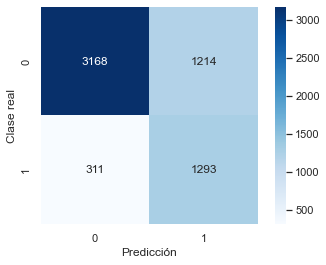

Resultados: 
	accuracy: 0.745
	recall: 0.806
	precision: 0.516
	f1_score: 0.629


In [47]:
y_pred = GS.predict(X)

show_results(y, y_pred)

___Respuesta:___

`La matriz de confusión muestra que el clasificador predice al menos el 80% de los abandonos reales. Sin embargo con una precisión de alrededor del 50% solo la mitad de los clientes identificados como posibles abandonos futuros son correctos. La politica de retención solo será efectiva para la mitad de ellos`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> Umbral de clasificación</font>


En el modelo de regresión logística, por ejemplo $c_\theta(x)=1$ si $h_\theta(x)>0.5$. Es posible cambiar este umbral (0.5), y con ello se modifican las propiedades del clasificador. Esto es aplicable a todos los modelos que devuelven probabilidad. En este apartado, veremos como afecta este cambio utilizando 3 umbrales: 0.25, 0.5, y 0.75.

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> Por simplicidad, no incluiremos este proceso en el _Pipeline_.
</div>

In [48]:
y_prob = churn_pipe_logr.predict_proba(X)[:,1]

* $c_\theta(x)=1$ si $h_\theta(x) >= 0.25$

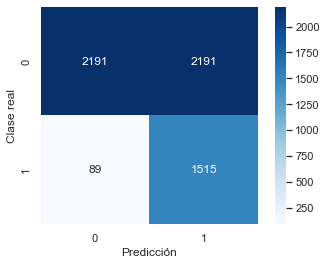

Resultados: 
	accuracy: 0.619
	recall: 0.945
	precision: 0.409
	f1_score: 0.571


In [49]:
y_pred = y_prob >= 0.25
show_results(y, y_pred)

* $c_\theta(x)=1$ si $h_\theta(x) >= 0.5$

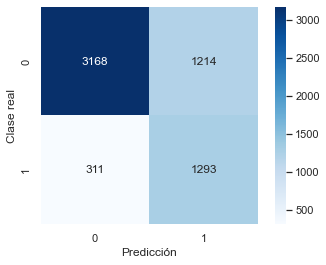

Resultados: 
	accuracy: 0.745
	recall: 0.806
	precision: 0.516
	f1_score: 0.629


In [50]:
y_pred = y_prob >= 0.5
show_results(y, y_pred)

* $c_\theta(x)=1$ si $h_\theta(x) >= 0.75$

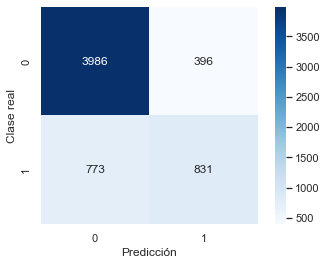

Resultados: 
	accuracy: 0.805
	recall: 0.518
	precision: 0.677
	f1_score: 0.587


In [51]:
y_pred = y_prob >= 0.75
show_results(y, y_pred)

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 16</font>

¿Cómo influye el cambio del umbral en las distintas métricas? ¿Por qué?

___Respuesta:___

`Al aumentar el umbral de clasificación se aumenta la precisión del modelo, pero se reduce el recall. Es decir, se clasifican menos instancias como positivas, lo que reduce el numero de verdaderos positivos (TP) y aumenta el numero de falsos negativos (FN) obteniendose un modelo menos sensible. Al perder esta sensibilidad se consigue una mayor especificadad ya que se aumenta el numero de verdaderos negativos (TN) y se reduce el numero de falsos positivos (FP).`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 17</font>

Dibujar la curva _precision/recall_ utilizando `sklearn.metrics.precision_recall_curve`. ¿Hay un umbral más adecuado para este caso? ¿De qué factor dependería?

<font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> La función devuelve tres vectores, cada uno de ellos con los valores correspondientes a _precision_ y _recall_ d eun _threshold_, que es el tercer vector. Se trata de obtener estos valores y dibujar la curva correspondiente mediante, por ejemplo, `plt.plot()`.

Umbrales considerados: 		 [0.006  0.006  0.0061 ... 0.9312 0.9329 0.9343]
Predicciones (valores únicos):   [0.0027 0.0027 0.0028 ... 0.9312 0.9329 0.9343]


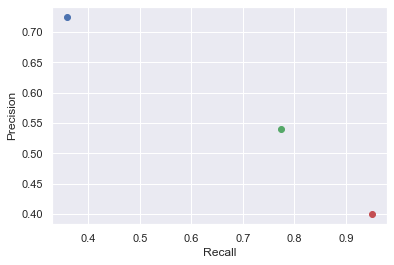

In [52]:
from sklearn.metrics import precision_recall_curve

#
precision, recall, thresholds = precision_recall_curve(y_true=y, probas_pred=y_prob)
#

plt.plot(recall[2000],precision[2000], 'or'); # Umbral = 0.227, rojo
plt.plot(recall[3500],precision[3500], 'og'); # Umbral = 0.5, verde
plt.plot(recall[5000],precision[5000], 'ob'); # Umbral = 0.805, azul
plt.xlabel('Recall')
plt.ylabel('Precision');

print("Umbrales considerados: \t\t", np.round(thresholds,4))
print("Predicciones (valores únicos):  ", np.round(np.unique(y_prob),4))

___Respuesta:___

`La curva precision-recall calcula pares precision-recall para distintos umbrales de las probabilidades de las predicciones. El umbral de clasificación que maximice la curva precision/recall dependerá del contexto específico de la aplicación. En este ejemplo del abandono de clientes de servicios de telefono e internet se supone que se quiere desarrollar una herramienta para predecir que clientes van a abandonar la compañia y poder contactar a estos clientes para ofrecerles mejoras en su servicio que le ayuden a decidir permanecer en la compañia. Por lo tanto, existirá un presupuesto limitado para este tipo de campañas. En este caso serían necesarios modelos predictivos con una gran precision (alto número de verdaderos positivos dentro de las predicciones por ejemplo con un umbral de 0.805). Asi nos aseguramos que solo contactamos con clientes que estamos seguros que van a abandonar la compañia gastando adecuadamente el presupuesto de la campaña aunque queden clientes potenciales que dejarán la compañia sin contactar (alto número de falsos negativos por bajo recall) `


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---


<a id="section13"></a>
## <font color="#00586D"> 1.3 Validación sobre nuevos datos </font>
<br>



En este proceso se ha construído el modelo, y se dispone del flujo de trabajo completo, que se compone por una preparación de la base de datos original mediante `preprocess_data`, y del _Pipeline_ `churn_pipe_logr`. 

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 18</font>

Utilizar ambos para predecir los casos de abandono en `df_churn_new`. Puede utilizarse también un umbral de entre los seleccionados anteriormente. Mostrar los resultados.

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: Ha de convertirse la clase a `int` porque ese paso se había sacado fuera del pipeline.                   
</div>

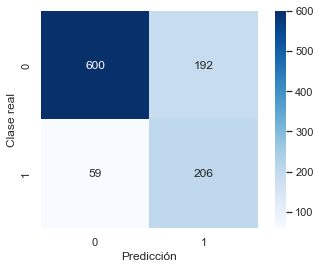

Resultados: 
	accuracy: 0.763
	recall: 0.777
	precision: 0.518
	f1_score: 0.621


In [53]:
df_churn_new_aux = df_churn_new.copy()

preprocess_data(df_churn_new_aux, churn_data_prep_pipeline)

X_new = df_churn_new_aux.drop(columns=['Churn'])
y_new = (df_churn_new_aux['Churn']=='Yes').astype(int)


y_new_pred = GS.predict(X_new)

y_new_prob = churn_pipe_logr.predict_proba(X_new)[:,1]
y_new_pred = y_new_prob >= 0.5
show_results(y_new, y_new_pred)

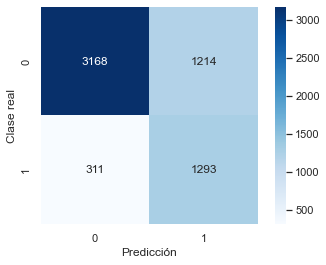

Resultados: 
	accuracy: 0.745
	recall: 0.806
	precision: 0.516
	f1_score: 0.629


In [54]:
# Se copian aqui los resultados obtenidos con el mismo umbral para el conjunto de entrenamiento y validacion
y_pred = y_prob >= 0.5
show_results(y, y_pred)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---


<a id="section14"></a>
## <font color="#00586D"> 1.4 Comparación con otros clasificadores </font>
<br>

Una vez definido el proceso, se repetirá el entrenamiento con otros clasificadores: Un árbol y una máquina de soporte vectorial.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 19</font>

 Construir un _Pipeline_ similar al anterior, denominado `churn_pipe_tree`, pero utilizando un árbol en lugar de un modelo de regresión logística.  Determinar la mejor configuración de los parámetros con `GridSearchCV`, utilizando como `scoring` la medida que consideréis más adecuada. Guardar el modelo resultante en `churn_pipe_tree`. Mostrar los resultados con respecto al conjunto de nuevos datos `X_new, y_new`. 

Mejor score:  0.6133507913283166
Mejore configuración de parámetros:  {'clas__class_weight': 'balanced', 'clas__max_depth': 5, 'prep__num__imputer__strategy': 'mean'}


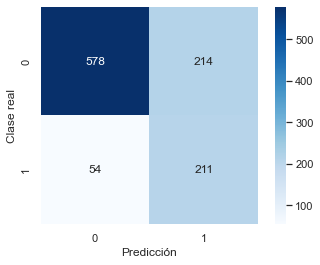

Resultados: 
	accuracy: 0.746
	recall: 0.796
	precision: 0.496
	f1_score: 0.612


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

dt_model = DecisionTreeClassifier();

churn_pipe_tree = Pipeline(steps=[('prep', churn_trans),
                                  ('clas', dt_model)])

parameters = {}
parameters['prep__num__imputer__strategy'] = ['mean', 'median']
parameters['clas__max_depth'] = [None, 3, 5, 7, 9]
parameters['clas__class_weight'] = [None, 'balanced']


GS = GridSearchCV(churn_pipe_tree, param_grid=parameters, scoring='f1', cv=5)

GS.fit(X, y)
        
print("Mejor score: ", GS.best_score_)
print("Mejore configuración de parámetros: ", GS.best_params_)


churn_pipe_tree = GS.best_estimator_


y_new_pred = GS.predict(X_new)

y_new_prob = churn_pipe_tree.predict_proba(X_new)[:,1]
y_new_pred = y_new_prob >= 0.5
show_results(y_new, y_new_pred)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 20</font> 

Dibujar la curva _Precision/Recall_ también con respecto a los nuevos datos.


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> __Nota__: La  curva se puede dibujar con `sklearn.metrics.PrecisionRecallDisplay.from_estimator`. Puede verse que cambia el aspecto, ya que, en realidad, la curva se debe hacer escalonada.                   
</div>

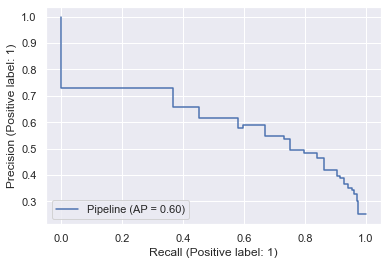

In [56]:
from sklearn.metrics import PrecisionRecallDisplay

PrecisionRecallDisplay.from_estimator(estimator=churn_pipe_tree, X=X_new, y=y_new)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 21</font>

¿Cómo aumentaríamos al precisión hasta un 0.75 (con respecto a los datos obtenidos en el ejercicio anterior, con umbral 0.5)? ¿Compensaría hacerlo?

___Respuesta:___

`Para aumentar la precisión se podría aumentar el umbral de clasificación. A priori compensaría hacerlo si el recall no baja demasiado. De acuerdo a la curva, el recall bajaria hasta aproximadamente 0.375 y tal como se ha comentado antes un descenso del recall no es tan crítico para la aplicación en la que se está trabajando.`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 22</font>

Construir un _Pipeline_ similar al anterior, denominado `churn_pipe_svc`, y que utilice una máquina de soporte vectorial.  Determinar la mejor configuración de los parámetros con `GridSearchCV`, utilizando como `scoring` la medida que consideréis más adecuada. Guardar el modelo resultante en `churn_pipe_svc`. Mostrar los resultados con respecto al conjunto de nuevos datos `X_new, y_new`.

Mejor score:  0.5881230251542299
Mejore configuración de parámetros:  {'clas__C': 100, 'clas__kernel': 'linear', 'prep__num__imputer__strategy': 'median'}


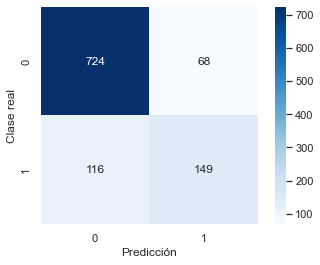

Resultados: 
	accuracy: 0.826
	recall: 0.562
	precision: 0.687
	f1_score: 0.618


In [57]:
from sklearn.svm import SVC

svm_model = SVC(probability=True);

churn_pipe_svc = Pipeline(steps=[('prep', churn_trans),
                                 ('clas', svm_model)])

parameters = {}
parameters['prep__num__imputer__strategy'] = ['mean', 'median']
parameters['clas__C'] = [10e-2, 1, 100]
parameters['clas__kernel'] = ['linear', 'rbf']

GS = GridSearchCV(churn_pipe_svc, param_grid=parameters, scoring='f1', cv=5)

GS.fit(X, y)
        
print("Mejor score: ", GS.best_score_)
print("Mejore configuración de parámetros: ", GS.best_params_)


churn_pipe_svc = GS.best_estimator_


y_new_pred = GS.predict(X_new)

y_new_prob = churn_pipe_svc.predict_proba(X_new)[:,1]
y_new_pred = y_new_prob >= 0.5
show_results(y_new, y_new_pred)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 23</font>

Dibujar la curva _Precision/Recall_ también con respecto a los nuevos datos.

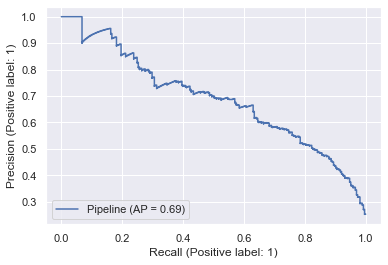

In [58]:
PrecisionRecallDisplay.from_estimator(estimator=churn_pipe_svc, X=X_new, y=y_new)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> Comparación de los modelos </font>
<br>

Como se ha visto anteriormente, el rendimiento de cada modelo de clasificación depende del umbral a partir del cual se considere una predicción como positiva. A la hora de comparar se podría determinar el umbral más conveniente para cada uno, y después utilizar los resultados obtenidos. 

El área bajo la curva ROC (AUC) proporciona una medida del rendimiento considerando todos los umbrales posibles. Representa la probabilidad de que el modelo asigne un _score_ mayor a un modelo positivo que a un negativo, y es invariable con respecto a este factor. Por eso se utiliza para la comparación de modelos. 

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 24</font>
Dibujar la curva ROC para los tres modelos (utilizar los datos nuevos). ¿Qué clasificador es mejor?

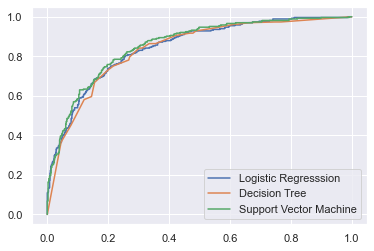

In [59]:
from sklearn.metrics import roc_curve

y_prob_logr = churn_pipe_logr.predict_proba(X_new)[:,1]
y_prob_tree = churn_pipe_tree.predict_proba(X_new)[:,1]
y_prob_svc = churn_pipe_svc.predict_proba(X_new)[:,1]

fpr_logr , tpr_logr , thresholds_logr = roc_curve(y_new, y_prob_logr)
fpr_tree , tpr_tree , thresholds_tree = roc_curve(y_new, y_prob_tree)
fpr_svc , tpr_svc , thresholds_svc = roc_curve(y_new, y_prob_svc)

plt.plot(fpr_logr, tpr_logr, label='Logistic Regresssion')
plt.plot(fpr_tree , tpr_tree, label='Decision Tree')
plt.plot(fpr_svc , tpr_svc, label='Support Vector Machine')
plt.legend()
plt.show()

___Respuesta:___

`El modelo Support Vector Machine es ligeramente mejor que los otros dos modelos estudiados. La diferencia entre los 3 modelos es pequeña.`


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 25</font>
Mostrar el AUC para cada uno de los clasificadores. ¿Se corresponde con lo esperado?

In [60]:
from sklearn.metrics import roc_auc_score
print("Regresión logística: ", roc_auc_score(y_new, y_prob_logr))
print("Árbol de decisión: ", roc_auc_score(y_new, y_prob_tree))
print("Máquina de vectores de soporte: ", roc_auc_score(y_new, y_prob_svc))

Regresión logística:  0.845926243567753
Árbol de decisión:  0.83732132647227
Máquina de vectores de soporte:  0.8565370688012197


___Respuesta:___

`Con estos numeros se observa lo mismo que se observaba en la curva ROC. SVC es ligeramente mejor y la diferencia entre los 3 modelos es pequeña.`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section2"></a>
# <font color="#00586D"> 2. Predicción del valor potencial de un cliente (_Customer Lifetime Value_)</font>
<br>

El valor potencial de un cliente (_Customer Lifetime Value_ o _CLV_) permite determinar el beneficio que un cliente puede proporcionar a lo largo de un periodo de tiempo. En muchos casos, este valor es función de otros, por lo que es posible elaborar modelos predictivos para llevar a cabo una estimación. En este ejercicio se parte de un conjunto de datos denominado `Marketing-Customer-Value-Analysis.csv`, obtenido también del sitio de [IBM analytics](https://www.ibm.com/analytics) con datos sobre CLV. 
<br>


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> A diferencia de la tarea anterior, en este caso el preprocesamiento se hará de modo más simple (no es necesario hacer más), y el trabajo se centrará en el desarrollo y análisis de un modelo de regresión.
</div>

In [61]:
df_clv = pd.read_csv('data/clv/Marketing-Customer-Value-Analysis.csv', index_col=0)

print("Tamaño del conjunto de datos:  %d" % df_clv.shape[0])
print("Número de variables: %d" % df_clv.shape[1])
if df_clv.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
    
# Visualiza las primeras instancias
df_clv.head()

Tamaño del conjunto de datos:  9134
Número de variables: 23
El índice es único.


,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
Customer,,,,,,,,,,,,,,,,,,,,,
BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


Los nombres de las columnas numéricas del _DataFrame_ se almacenan en una lista denominada `num_df_columns`, y el resto en otra denominada `dis_df_columns`. 

In [62]:
dis_df_columns = df_clv.select_dtypes(exclude=np.number).columns.to_list()
num_df_columns = df_clv.select_dtypes(include=np.number).columns.to_list()

print('Discretas: ',dis_df_columns)
print('\nNuméricas: ',num_df_columns)

Discretas:  ['State', 'Response', 'Coverage', 'Education', 'Effective To Date', 'EmploymentStatus', 'Gender', 'Location Code', 'Marital Status', 'Policy Type', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class', 'Vehicle Size']

Numéricas:  ['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies', 'Total Claim Amount']


En primer lugar, se procederá con las columnas que contienen valores discretos. Igual que anteriormente, conviene ver el número de valores que toma cada una para comprobar que, efectivamente, la representación corresponde a los datos. A continuación, se obtiene el número de valores para cada una de las variables discretas y se almacena en una lista denominada `num_values_dis_df_col`. Cada elemento de la lista ha de ser una tupla con el nombre de la columna y el número de variables. 

In [63]:
num_values_dis_df_col = list(map(lambda col: (col,len(df_clv[col].value_counts())), dis_df_columns))
num_values_dis_df_col

[('State', 5),
 ('Response', 2),
 ('Coverage', 3),
 ('Education', 5),
 ('Effective To Date', 59),
 ('EmploymentStatus', 5),
 ('Gender', 2),
 ('Location Code', 3),
 ('Marital Status', 3),
 ('Policy Type', 3),
 ('Policy', 9),
 ('Renew Offer Type', 4),
 ('Sales Channel', 4),
 ('Vehicle Class', 6),
 ('Vehicle Size', 3)]

La columna `Effective To Date` contiene datos relativos a fechas. Estos no pueden manejarse directamente en `scikit-learn`. Sin embargo, es posible convertirlos a enteros que representen días transcurridos desde una fecha determinada. Por ejemplo, la más temprana que aparezca en la columna.

En la siguiente celda, se convierte la columna `Effective To Date` a formato `DateTime`. Posteriormente se calcula la diferencia con la primera fecha y se convierte a entera (con `TimeDelta.dt.days`). Por último, se elimina la columna de `num_df_columns` y se añade a `dis_df_columns`.

In [64]:
df_clv['Effective To Date'] = pd.to_datetime(df_clv['Effective To Date'])

min_date = min(df_clv['Effective To Date'])
df_clv['Effective To Date'] = df_clv['Effective To Date'].apply(lambda date: date - min_date)
df_clv['Effective To Date'] = df_clv['Effective To Date'].dt.days

num_df_columns.append('Effective To Date')
dis_df_columns.remove('Effective To Date')

Debido a que solamente dos variables son binarias, y con el ánimo de simplificar, se tratarán todas como categóricas. 
<br>

A continuación se explorarán las variables numéricas para encontrar outliers. 

In [65]:
df_clv[num_df_columns].describe(percentiles=[0.01,0.05,0.25,0.5,0.75,0.95,0.99])

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,Effective To Date
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.940475,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794,28.837749
std,6870.967608,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092,16.942769
min,1898.007675,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007,0.000000
1%,2230.433731,0.000000,61.000000,0.000000,1.000000,0.000000,1.000000,10.402835,0.000000
5%,2475.109047,0.000000,62.000000,1.000000,4.000000,0.000000,1.000000,52.261227,2.000000
25%,3994.251794,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244,14.000000
50%,5780.182197,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434,28.000000
75%,8962.167041,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839,43.000000
95%,22064.361267,90374.350000,163.350000,33.000000,93.000000,3.000000,8.000000,960.115399,56.000000


Parece que solamente la variable de clase, `Customer Lifetime Value` podría presentar _outliers_. Para comprobar si esos valores extremos corresponden a un error o son parte del "fenómeno" que representa la variable, puede dibujarse la distribución de la misma. 

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 26</font> 
Dibujar la distribución de la variable `Customer Lifetime Value`  con una gráfica `sns.distplot()`/`sns.kdeplot()`.

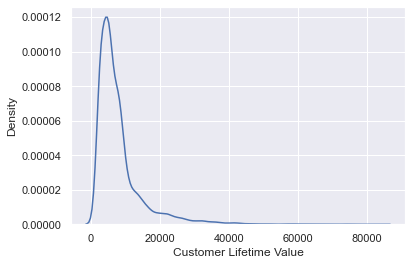

In [66]:
sns.kdeplot(x = df_clv['Customer Lifetime Value']);

Se aprecia que los valores extremos no son anomalías o errores. Sin embargo, la diferencia con la mayoría de valores es tan grande, y su proporción en la base de datos tan reducida, que conviene no incluirlos en el modelo. Por tanto, se van a considerar los clientes con un $CLV < 22000$, es decir, aproximadamente el 95%.

Una vez determinados los tipos de las características, y filtrados los casos extremos, se crearán los conjuntos de entrenamiento y test. 

In [67]:
from sklearn.model_selection import train_test_split

num_df_columns.remove('Customer Lifetime Value')
X = df_clv[df_clv['Customer Lifetime Value']<22000].drop('Customer Lifetime Value', axis=1)
y = df_clv.loc[df_clv['Customer Lifetime Value']<22000,'Customer Lifetime Value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Para llevar a cabo la transformación se utilizará el mismo procedimiento que en la tarea anterior(los _Pipelines_ `num_transformer` y  `cat_transformer`).

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 27</font>

Crear un objeto `ColumnTransformer` que aplique el _Pipeline_ de transformación `num_transformer` a las columnas en `num_df_colums`, el _Pipeline_ `cat_transformer` a las columnas en `dis_df_columns`. Denominarlo `clf_trans`. (Ambos fueron creados en la sección anterior).

In [68]:
clv_trans = ColumnTransformer(transformers=[('num', num_transformer, num_df_columns),('cat', cat_transformer, dis_df_columns)])

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Con respecto a la predicción, se utilizará inicialmente un modelo de regresión lineal.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 28</font>

Crear un objeto _Pipeline_, denominado `churn_pipe_linr` a partir de `clv_trans` y un modelo de regresión, que estará almacenado en la variable `linr_model`. Entrenarlo con los datos de entrenamiento. Imprimir el _score_ del modelo para entrenamiento y test. ¿Qué representa este _score_? ¿Qué valoración podría hacerse del mismo?

In [69]:
from sklearn.linear_model import LinearRegression

linr_model = LinearRegression();


churn_pipe_linr = Pipeline(steps=[('prep', clv_trans),
                                  ('clas', linr_model)])


churn_pipe_linr.fit(X_train, y_train);

print("Entrenamiento:", churn_pipe_linr.score(X_train,y_train))
print("Test:", churn_pipe_linr.score(X_test,y_test))

Entrenamiento: 0.2036479090814325
Test: 0.20095846269932616


___Respuesta:___

`El score representa el coeficiente de correlación R² del modelo. Este coeficiente indica la proporción de la varianza total de la variable de salida que es explicada por el modelo. En este caso, el score obtenido para ambos conjuntos de datos es relativamente bajo (0.20 para entrenamiento y 0.20 para prueba), lo que indica que el modelo no es capaz de explicar gran parte de la variabilidad en los datos de salida. Por lo tanto, se podría decir que el modelo no es muy adecuado para este problema.`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

La función `show_errors` muestra el error absoluto medio con respecto a los datos de entrenamiento y test, y también una medida del error relativo absoluto medio. Mostrar los errores relativos al modelo `churn_pipe_linr`. 

<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> El error relativo absoluto medio se calculará aquí como:

$$
error_{rel} = \frac{\sum_{i=1}^m \frac{|\hat{y_i} - y_i|}{y_i}}{m}.
$$

<br>

Hemos creado expresamente esta última medida para hacernos una idea de la magnitud del error con respecto al _CLV_ de cada usuario.
</div>

In [70]:
from sklearn.metrics import mean_absolute_error

def show_errors(y, y_pred):
    mae = mean_absolute_error(y, y_pred)
    rmae = np.sum(np.abs(y-y_pred)/y)/len(y)    
    print(f'\tEl error absoluto medio es: {mae:.2f}')
    print(f'\tEl error absoluto relativo medio es: {rmae:.2f}')

print('Entrenamiento')
y_pred = churn_pipe_linr.predict(X_train)
show_errors(y_train, y_pred)

print('Test')
y_pred = churn_pipe_linr.predict(X_test)
show_errors(y_test, y_pred)

Entrenamiento
	El error absoluto medio es: 2627.87
	El error absoluto relativo medio es: 0.46
Test
	El error absoluto medio es: 2573.51
	El error absoluto relativo medio es: 0.46


<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---


<a id="section21"></a>
## <font color="#00586D"> 2.1 Construcción de un árbol de regresión </font>
<br>



Puede apreciarse que, tal y como era de esperar, el error es muy alto. Por tanto se va a definir el procedimiento anterior, pero con un árbol de regresión.


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 29</font>

Crear un _Pipeline_ denominado `churn_pipe_dtr`, similar al anterior, pero en el que el modelo predictivo sea un árbol de regresión. Entrenarlo e imprimir su _score_ para entrenamiento y test. 



In [71]:
from sklearn.tree import DecisionTreeRegressor


dtr_model = DecisionTreeRegressor(random_state=0);

churn_pipe_dtr = Pipeline(steps=[('prep', clv_trans),
                                 ('clas', dtr_model)])


churn_pipe_dtr.fit(X_train, y_train);

print("Entrenamiento:", churn_pipe_dtr.score(X_train,y_train))
print("Test:", churn_pipe_dtr.score(X_test,y_test))

Entrenamiento: 1.0
Test: 0.702649059852204


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

La siguiente celda muestra el error absoluto medio (también el relativo) para entrenamiento y test: 

In [72]:
print('Entrenamiento')
y_pred = churn_pipe_dtr.predict(X_train)
show_errors(y_train, y_pred)

print('Test')
y_pred = churn_pipe_dtr.predict(X_test)
show_errors(y_test, y_pred)

Entrenamiento
	El error absoluto medio es: 0.00
	El error absoluto relativo medio es: 0.00
Test
	El error absoluto medio es: 692.63
	El error absoluto relativo medio es: 0.07


Por otra parte, el tamaño del árbol obtenido es:

In [73]:
print(f"Profundidad: {churn_pipe_dtr.named_steps['clas'].get_depth()}")
print(f"Número de hojas: {churn_pipe_dtr.named_steps['clas'].get_n_leaves()}")

Profundidad: 30
Número de hojas: 5278


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 30</font> 

¿Qué conclusión se puede sacar de los resultados?

___Respuesta:___

`El modelo de árbol de regresión muestra sobreajuste de los datos de entrenamiento al tener un error absoluto medio de entrenamiento de 0.0 y una profundidad muy grande de 30, lo que sugiere que el modelo es demasiado complejo. El error absoluto medio de test es mucho más alto que el de entrenamiento, lo que sugiere que el modelo no generaliza bien a nuevos datos.`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

En el caso anterior, no se había limitado la profundidad, por lo que el tamaño del árbol resultante es muy grande.
 
#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 31</font> 


A continuación se determinará, mediante `GridSearchCV` la profundidad adecuada. Crear un _Pipeline_ similar anterior, denominado `churn_pipe_dtr_p`. Utilizar validación cruzada de 5 particiones, y `neg_mean_absolute_error` como medida de _scoring_.  Almacenar el _Pipeline_ resultante en `churn_pipe_dtr_p`. Por último, imprimir los _score_ ($R^2$) del modelo obtenido.

In [76]:
parameters = {}
parameters['clas__max_depth'] = [None, 2, 5, 10, 15, 20]

dtr_p_model = DecisionTreeRegressor(random_state=0);

churn_pipe_dtr_p = Pipeline(steps=[('prep', clv_trans),
                                   ('clas', dtr_p_model)])

GS_p = GridSearchCV(churn_pipe_dtr_p, param_grid=parameters, scoring='neg_mean_absolute_error', cv=5)

GS_p.fit(X_train, y_train);

print("Mejor score: ", GS_p.best_score_)
print("Mejore configuración de parámetros: ", GS_p.best_params_)

churn_pipe_dtr_p = GS_p.best_estimator_

print("\nEntrenamiento:", churn_pipe_dtr_p.score(X_train,y_train))
print("Test:", churn_pipe_dtr_p.score(X_test,y_test))

Mejor score:  -725.3055980428136
Mejore configuración de parámetros:  {'clas__max_depth': 10}

Entrenamiento: 0.8893117529464726
Test: 0.7836483671865917


Por otra parte, el tamaño del árbol obtenido es ahora:

In [77]:
print(f"Profundidad: {churn_pipe_dtr_p.named_steps['clas'].get_depth()}")
print(f"Número de hojas: {churn_pipe_dtr_p.named_steps['clas'].get_n_leaves()}")

Profundidad: 10
Número de hojas: 695


Error absoluto medio (también el relativo) para entrenamiento y test: 

In [78]:
print('Entrenamiento')
y_pred = churn_pipe_dtr_p.predict(X_train)
show_errors(y_train, y_pred)

print('Test')
y_pred = churn_pipe_dtr_p.predict(X_test)
show_errors(y_test, y_pred)

Entrenamiento
	El error absoluto medio es: 466.04
	El error absoluto relativo medio es: 0.05
Test
	El error absoluto medio es: 673.70
	El error absoluto relativo medio es: 0.07


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 32</font>


Compara y analiza los resultados obtenidos con respecto a los obtenidos anteriormente.

___Respuesta:___

`Al utilizar GridSearchCV para encontrar la profundidad óptima se redujo dicha profundidad a 10 y el número de hojas a 695, lo que resultó en una mejora significativa en el rendimiento del modelo, con un 𝑅2 de entrenamiento de 0.889 y un 𝑅2 de test de 0.784. Además, el error absoluto medio (MAE) se redujo en ambos conjuntos de datos, lo que indica que el modelo es más preciso en sus predicciones.`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<a id="section3"></a>
# <font color="#00586D"> 3. Segmentación de clientes</font>
<br>

En el manejo de la relación con el cliente (_CRM_) es necesario tener en cuenta varios factores. Por un lado, cada cliente tiene unas peculiaridades, y la relación con él se ha de definir de manera concreta. Por otro lado, el número de clientes es elevado, y no es posible personalizar completamente el modo en que se va a llevar la relación. Debido a esto, una de las tareas relacionadas con ciencia de datos que son más comunes en _CRM_ es la segmentación, cuyo objetivo es crear grupos de clientes con el mismo perfil.
<br>

Para abordar la segmentación se utilizan algoritmos de _clustering_. Una de las particularidades de estos algoritmos es que pierden utilidad cuando se trata con un número muy elevado de variables. Por eso suelen utilizarse con conjuntos reducidos. Un tipo de análisis frecuente en este sentido es el RFM (_Recency_, _Frequency_, _Monetary value_), en el que se segmenta a los clientes en función de cuando hicieron su última transacción, con qué frecuencia han hecho transacciones, y cuanto dinero han gastado en total. 
<br>

En esta tarea se partirá de un conjunto de datos de venta online obtenido en el repositorio de conjuntos de datos de la [UCI](https://archive.ics.uci.edu/ml/datasets/online+retail) (un subconjunto de éste). Tras una serie de transformaciones, se utilizará `KMeans` para caracterizar los clusters.

A continuación, se lee el conjunto de datos `data/segmentation/online12M.csv` y se guarda en el `DataFrame` `df_ol`. La columna `InvoiceDate` se trata como marca de tiempo. 

In [79]:
# Carga los datos 
df_ol = pd.read_csv('data/segmentation/online12M.csv', index_col=0, parse_dates=['InvoiceDate']);

print("Tamaño del conjunto de datos:  %d" % df_ol.shape[0])
print("Número de variables: %d" % df_ol.shape[1])
if df_ol.index.is_unique:
    print('El índice es único.')
else:
    print('Los índices están duplicados.')
    
# Visualiza las primeras instancias
df_ol.head()

Tamaño del conjunto de datos:  68176
Número de variables: 8
El índice es único.


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom


Una de las columnas que vamos a utilizar (_Monetary Value_) hace referencia al precio total gastado por cliente. La columna  `Total` almacena el resultado de multiplicar el precio por unidad de cada compra (`UnitPrice`) por la cantidad de unidades (`Quantity`).

In [80]:
df_ol['Total'] = df_ol['Quantity']*df_ol['UnitPrice']
df_ol.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total
416792,572558,22745,POPPY'S PLAYHOUSE BEDROOM,6,2011-10-25,2.10,14286,United Kingdom,12.60
482904,577485,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,2011-11-20,1.45,16360,United Kingdom,1.45
263743,560034,23299,FOOD COVER WITH BEADS SET 2,6,2011-07-14,3.75,13933,United Kingdom,22.50
495549,578307,72349B,SET/6 PURPLE BUTTERFLY T-LIGHTS,1,2011-11-23,2.10,17290,United Kingdom,2.10
204384,554656,21756,BATH BUILDING BLOCK WORD,3,2011-05-25,5.95,17663,United Kingdom,17.85


A continuación se crearán las columnas `Recency, Frequency` y `MonetaryValue`. Para ello, se han de agrupar los datos por cliente, y después hacer una agregación a partir del grupo sobre las columnas:
* `InvoiceDat`. Hay que crear un día de referencia (el posterior al último de la lista) y restarle el último día (`max`) en que compró cada cliente. El resultado, un `TimeDelta` se devuelve en días (`.days`).
* `InvoiceNo`. Se cuenta el número de facturas.
* `MonitaryValue`. Se suma, para cada grupo, la columna `Total`.

A continuación se obtiene la información según el procedimiento descrito, y se almacena en el `DataFrame` `df_rfm`.

In [81]:
import datetime
dia_ref = max(df_ol['InvoiceDate']) + datetime.timedelta(days=1)

In [82]:
df_rfm = df_ol.groupby(['CustomerID']).agg({ 
    'InvoiceDate': lambda x: (dia_ref - x.max()).days, 
    'InvoiceNo': 'count',
    'Total': 'sum'})

df_rfm.rename(columns = {'InvoiceDate': 'Recency', 'InvoiceNo': 'Frequency', 'Total': 'MonetaryValue'}, inplace=True)

df_rfm.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12747,3,25,948.70
12748,1,888,7046.16
12749,4,37,813.45
12820,4,17,268.02
12822,71,9,146.15


<div class="alert alert-block alert-info">
    
<i class="fa fa-info-circle" aria-hidden="true"></i> Un valor más alto de `Recency` implica que la última compra del cliente ocurrió hace más tiempo.
</div>

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 33</font>

Dibujar la distribución de cada una de las variables mediante `sns.kdeplot()` en una figura de $1 \times 3$ gráficas.

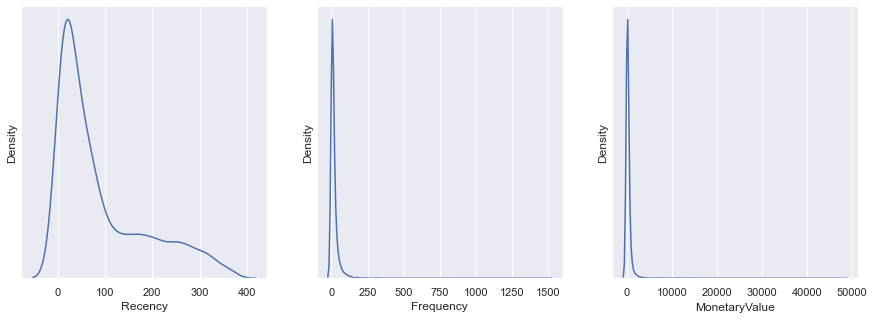

In [83]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
features = ['Recency', 'Frequency','MonetaryValue']
for col, ax in enumerate(axs.flatten()):
    col_name = features[col]
    #
    sns.kdeplot(x = col_name, data= df_rfm, ax = ax)
    #
    ax.set_yticks([])

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Puede apreciarse que las distribuciones están muy sesgadas. Esto supone un problema para el algoritmo `KMeans` que construye los clusters por distancias. Una forma de solucionarlo es utilizar el logaritmo de las variables.  El resultado se almacena en el `DataFrame` `dt_rfm_log`.

In [84]:
df_rfm_log = np.log(df_rfm)

**La diferencia de escalas también supone un problema**, ya que intrínsecamente, hace que el cálculo de las distancias de más importancia a las variables con mayor rango. Debido a esto, es necesario estandarizar los datos. El resultado se almacena en el *DataFrame* `df_rfm_norm`.

In [85]:
df_rfm_norm = df_rfm_log - df_rfm_log.mean()
df_rfm_norm = df_rfm_norm / df_rfm_log.std()
df_rfm_norm.describe()

,Recency,Frequency,MonetaryValue
count,3.643000e+03,3.643000e+03,3.643000e+03
mean,-7.604344e-15,-1.081413e-14,-1.258310e-14
std,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.814131e+00,-1.794485e+00,-4.092988e+00
25%,-6.373074e-01,-6.490904e-01,-6.578277e-01
50%,9.266763e-02,2.092218e-02,-1.489601e-02
75%,8.339256e-01,7.209827e-01,6.692029e-01
max,1.547663e+00,4.246243e+00,4.458854e+00


Una vez preparados los datos, se puede llevar a cabo el procedimiento de agrupación. El algoritmo `KMeans` toma como parametro más importante `k` que corresponde al número de clusters. Cuando no se tiene información a priori, se dibuja la curva del coste en función de `k`. Debido a que se busca un compromiso entre un bajo coste, y un número reducido de clusters,  se toma aquel valor de `k ` a partir del cual el descenso es menor. Este método se conoce como _método del codo_.

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 34</font>

Ejecutar `KMeans` para valores del 1 al 15 sobre el conjunto de datos `df_rfm_norm`. Almacenando el coste resultante (`KMeans.inertia_`) para cada valor de `k` en el diccionario `cost`.

In [106]:
from sklearn.cluster import KMeans

cost = {}
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(df_rfm_norm)
    cost[k] = kmeans.inertia_

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

 #### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 35</font> 
 
 Dibujar la función de coste (utilizar `cost.keys()` y `cost.values()`).

<AxesSubplot:>

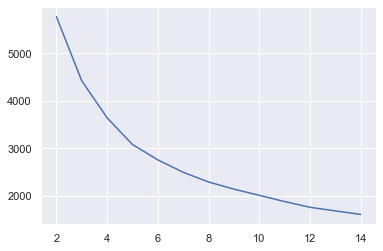

In [110]:
sns.lineplot(x=cost.keys(), y =cost.values())

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Parece que a partir de $k=4$ el descenso es menor. 

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 36</font> 

Realizar el agrupamiento con `k=4`.

In [111]:
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(df_rfm_norm)

KMeans(n_clusters=4, random_state=0)

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Con el fin de analizar cada grupo, se trabajará con los datos de `df_rfm` (podría trabajarse incluso con el conjunto inicial si fuese necesario). A continuación, se añade a cada entrada de `df_rfm `, una columna denominada `Group` con la etiqueta correspondiente al cluster (`KMeans.labels_`).

In [114]:
df_rfm = df_rfm.assign(Group = kmeans.labels_)
df_rfm.head()

,Recency,Frequency,MonetaryValue,Group
CustomerID,,,,
12747,3,25,948.70,0
12748,1,888,7046.16,0
12749,4,37,813.45,0
12820,4,17,268.02,0
12822,71,9,146.15,1


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 37</font>

Obtener la media por grupo para cada una de las columnas de `df_rfm` (excepto `Group`, obviamente). Almacenar el resultado en `df_clusters_mean`.
 

<div class="alert alert-block alert-warning">
    
<i class="fa fa-exclamation-circle" aria-hidden="true"></i> Esto nos da los centroides, pero con respecto al conjunto original. `kmeans.cluster_centers_` nos daría esa información, pero con respecto al logaritmo de los datos normalizado. Lo que no es representativo de cara a describir los grupos.
</div>

In [116]:
df_clusters_mean = df_rfm.groupby('Group').mean()
df_clusters_mean

,Recency,Frequency,MonetaryValue
Group,,,
0,19.475449,53.742515,1129.977401
1,129.379689,11.797804,231.814584
2,19.507171,10.348110,145.583978
3,165.422996,2.604430,44.169061


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

Un modo sencillo de visualizar los datos consiste dividir los valores medios de cada grupo por las medias de cada columna para el total de la información. Esto devolvería la importancia relativa de cada variable en cada cluster.  

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 38</font>
  Llevar a cabo esta operación y almacenar el resultado en `relative_imp`. Restar 1 al resultado para que un valor 0 corresponda con la media de cada columna (no hay diferencia entre el grupo y el total).
  
  <font size=2 color="#00586D"> <i class="fa fa-info-circle"  aria-hidden="true"></i> </font> En el ejercicio anterior se han obtenido las medias para cada columna/grupo, y se han almacenado en `df_clusters_mean`. En este, se ha de calcular la media de cada columna de `df_rfm`, lo que da lugar a una *Serie* con tres elementos. La división del *DataFrame* por la *Serie* se hace por *Broadcasting*, por lo que se divide cada una de las filas. Al resultado hay que restarle uno.

In [131]:
relative_imp = (df_clusters_mean / df_rfm.mean().drop('Group')) - 1
relative_imp

,Recency,Frequency,MonetaryValue
Group,,,
0,-0.784648,1.871743,2.048272
1,0.430627,-0.369582,-0.374648
2,-0.784298,-0.447046,-0.607267
3,0.829179,-0.860832,-0.880848


<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->


#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 39</font>  

Dibujar un mapa de calor con los datos de `relative_imp`. Utilizar anotaciones con formato `.2f` y el mapa de color `RdYlGn`.

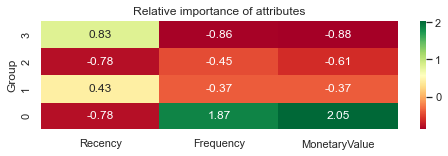

In [132]:
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')

sns.heatmap(relative_imp, cmap="RdYlGn", annot=True, fmt=".2f")

plt.gca().set_ylim(0,4);

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

#### <font color="#00586D"> <i class="fa fa-pencil-square-o" aria-hidden="true" ></i> Ejercicio 40</font>  

¿Qué caracteriza, a cada grupo? Proporcionar una descripción de los mismos.

___Respuesta:___

`Grupo 0: Este grupo se caracteriza por tener clientes con una Recency (tiempo desde su última compra) muy baja. Además, tienen un alto Frequency y un alto MonetaryValue lo que indica que son clientes habituales que compran con frecuencia y gastan mucho dinero. Podríamos denominar a este grupo como los "Clientes Fieles y Valiosos".

Grupo 1: Este grupo se caracteriza por tener clientes con una Recency cercana a la media, lo que indica que han comprado hace tanto tiempo como la media de los clientes. Sin embargo, tienen un bajo Frequency y un bajo MonetaryValue. Podríamos denominar a este grupo como los "Clientes Ocasionales".

Grupo 2: Este grupo se caracteriza por tener clientes con una Recency muy baja, como el Grupo 0. Sin embargo, su Frequency y MonetaryValue son muy bajos. Podríamos denominar a este grupo como los "Nuevos clientes".

Grupo 3: Este grupo se caracteriza por tener clientes con una Recency alta, lo que indica que han pasado mucho tiempo desde su última compra. Además, su Frequency y MonetaryValue son muy bajos. Podríamos denominar a este grupo como los "Clientes Inactivos y Perdidos".`

<div><font size=3 color=#00586D> <i class="fa fa-check-square-o" aria-hidden="true"></i></font></div>

<!--comment -->

<div align="right">
<a href="#indice"><font size=5 color="#00586D"><i class="fa fa-arrow-circle-up" aria-hidden="true"></i></font></a>
</div>

---

<div align="right">
<a href="#indice"><font size=6 color="#00586D"><i class="fa fa-coffee" aria-hidden="true"></i></font></a>
</div>